<a href="https://colab.research.google.com/github/dhayanesh/CNN-Transformer-EfficientNet-LeNet/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1:**
Demonstrate that a neural network to maximize the log-likelihood of the label has softmax output nodes and minimizes the criterion function of the negative log probability of the training data set. Train a LeNet-5 to classify CIFAR-10 images with and without image augmentation — plot training/validation loss/accuracy, provide the confusion matrix, and draw some correctly and incorrectly classified images. What best performance can you get? Useful links:

*   https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48 
*   https://paperswithcode.com/sota/image-classification-on-cifar-10

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
cifar10  = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
X_train = tf.floor(tf.constant(x_train, dtype = tf.float32)/255)
Y_train = tf.constant(y_train, dtype = tf.int32)
X_test = tf.floor(tf.constant(x_test, dtype = tf.float32)/255)
Y_test = tf.constant(y_test, dtype = tf.int32)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
modelAug = Sequential()
modelAug.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Flatten())
modelAug.add(Dense(256, activation='relu'))
modelAug.add(Dense(84, activation='relu'))
modelAug.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/50
391/391 [==============================] - 5s 7ms/step - loss: 2.7629 - accuracy: 0.2565 - val_loss: 1.8086 - val_accuracy: 0.3540
Epoch 2/50
391/391 [==============================] - 3s 7ms/step - loss: 1.6151 - accuracy: 0.4147 - val_loss: 1.4894 - val_accuracy: 0.4564
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 1.3889 - accuracy: 0.5026 - val_loss: 1.4336 - val_accuracy: 0.4875
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2547 - accuracy: 0.5525 - val_loss: 1.2783 - val_accuracy: 0.5428
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.1323 - accuracy: 0.5983 - val_loss: 1.2630 - val_accuracy: 0.5619
Epoch 6/50
391/391 [==============================] - 3s 6ms/step - loss: 1.0365 - accuracy: 0.6343 - val_loss: 1.1904 - val_accuracy: 0.5912
Epoch 7/50
391/391 [==============================] - 3s 7ms/step - loss: 0.9303 - accuracy: 0.6715 - val_loss: 1.1744 - val_accuracy: 0.6022
Epoch 

In [ ]:
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
modelAug.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
historyAug = modelAug.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=50, validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/50
390/390 [==============================] - 29s 70ms/step - loss: 2.3086 - accuracy: 0.2771 - val_loss: 1.6699 - val_accuracy: 0.3969
Epoch 2/50
390/390 [==============================] - 28s 71ms/step - loss: 1.6079 - accuracy: 0.4158 - val_loss: 1.4463 - val_accuracy: 0.4744
Epoch 3/50
390/390 [==============================] - 28s 72ms/step - loss: 1.4772 - accuracy: 0.4681 - val_loss: 1.3744 - val_accuracy: 0.5195
Epoch 4/50
390/390 [==============================] - 27s 70ms/step - loss: 1.3972 - accuracy: 0.5023 - val_loss: 1.2750 - val_accuracy: 0.5472
Epoch 5/50
390/390 [==============================] - 27s 70ms/step - loss: 1.3403 - accuracy: 0.5229 - val_loss: 1.2171 - val_accuracy: 0.5644
Epoch 6/50
390/390 [==============================] - 27s 69ms/step - loss: 1.2586 - accuracy: 0.5540 - val_loss: 1.1415 - val_accuracy: 0.5961
Epoch 7/50
390/390 [==============================] - 27s 70ms/step - loss: 1.2149 - accuracy: 0.5714 - val_loss: 1.1153 - val_accuracy:

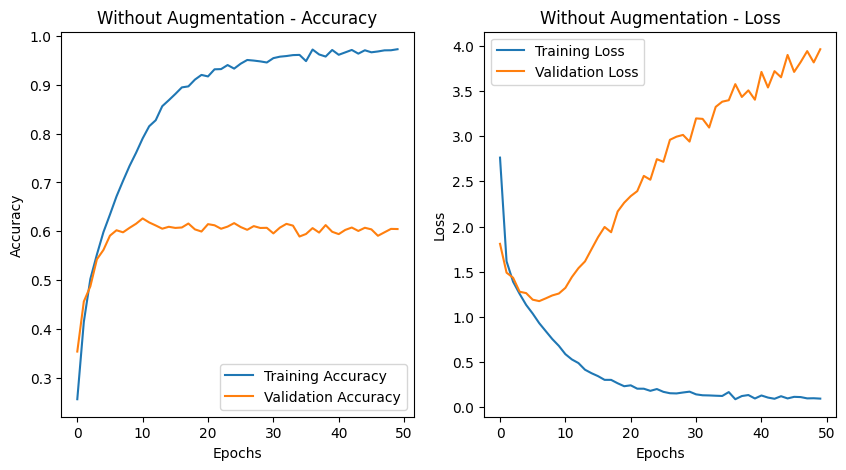

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Without Augmentation - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Without Augmentation - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

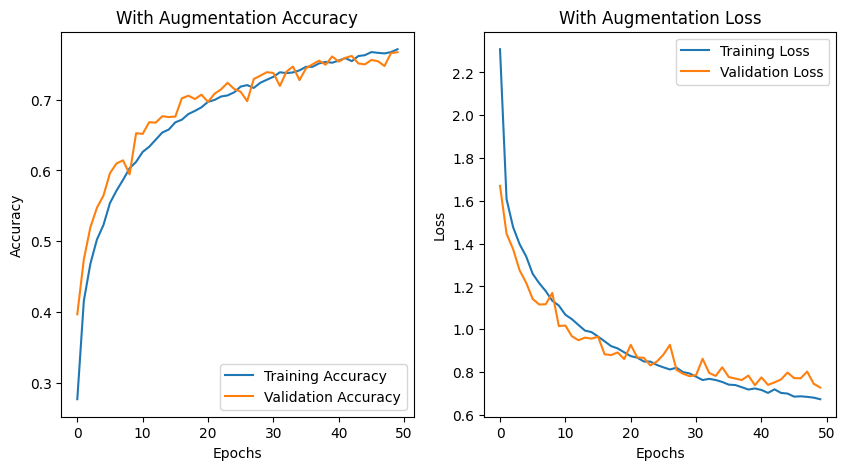

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(historyAug.history['accuracy'], label='Training Accuracy')
plt.plot(historyAug.history['val_accuracy'], label='Validation Accuracy')
plt.title('With Augmentation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.title('With Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(x_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)
conf_Mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix - Augmentation:\n", conf_Mat)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[735  28  69  29  15   8   6  10  74  26]
 [ 26 780  12  13   6   5  12   4  30 112]
 [ 94  11 495  94 103  73  41  57  21  11]
 [ 49  22  88 411  56 222  45  61  15  31]
 [ 59   9 120 102 486  60  32 113  15   4]
 [ 25  12  87 182  47 509  18  89  19  12]
 [ 19  18  70 115  71  69 574  17  22  25]
 [ 36   8  48  64  39  79   6 698   6  16]
 [103  48  24  30  12   9   6   9 725  34]
 [ 75 143  21  29   8  22   3  33  32 634]]


In [ ]:
y_pred_aug = tf.argmax(modelAug.predict(x_test), axis=-1)
y_true_aug = tf.argmax(y_test, axis=-1)
conf_MatAug = confusion_matrix(y_true_aug, y_pred_aug)
print("Confusion Matrix - Augmentation:\n", conf_MatAug)

313/313 [==============================] - 1s 2ms/step
Confusion Matrix - Augmentation:
 [[824  29  41  13   6   2   7  10  30  38]
 [  9 949   3   2   1   0   4   0   5  27]
 [ 53   2 705  40  64  23  64  27  11  11]
 [ 30  10  83 616  47  89  77  23  13  12]
 [ 29   5  62  50 720  16  61  48   6   3]
 [ 22   7  61 178  50 574  40  50   9   9]
 [ 12   8  29  38  15   5 882   3   4   4]
 [ 17   3  36  40  50  24  11 802   2  15]
 [ 73  61  24   9   2   3   4   3 799  22]
 [ 29 133   2   9   1   2   9   7  11 797]]


313/313 [==============================] - 1s 2ms/step
Correctly classified images for model without augmentation:


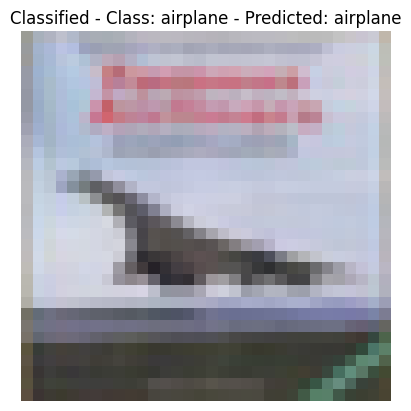

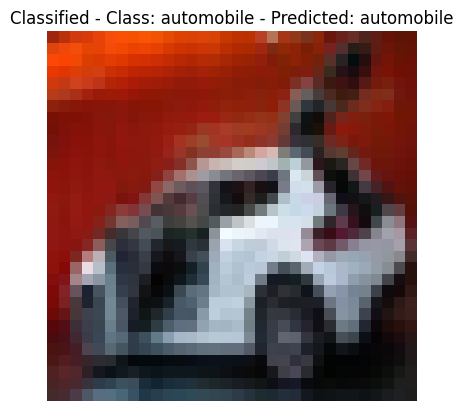

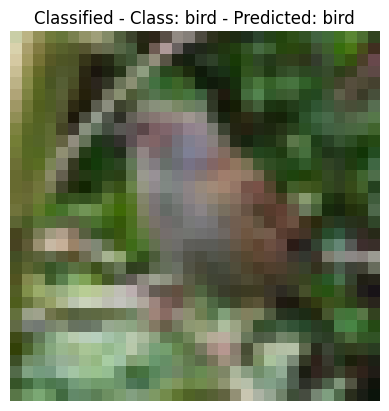

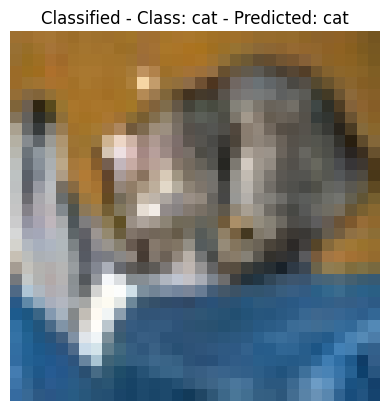

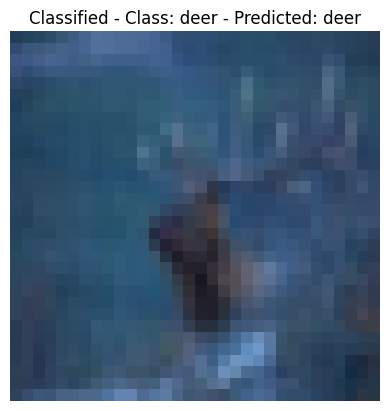

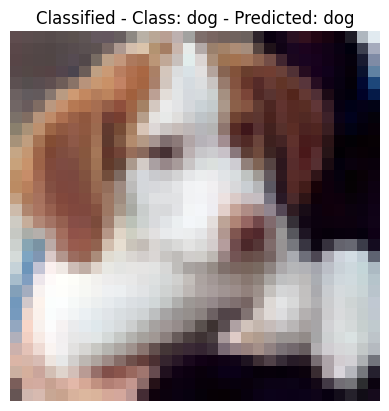

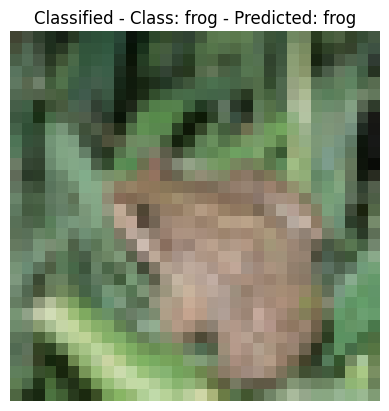

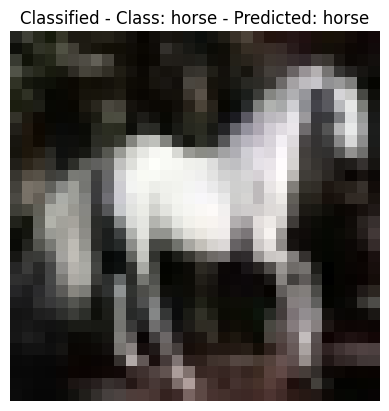

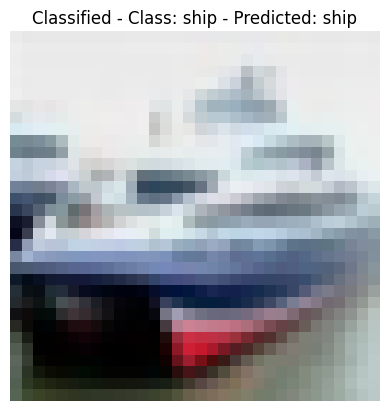

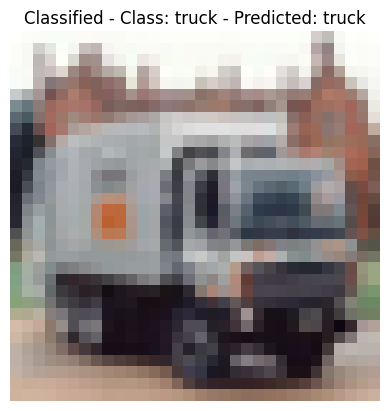

Incorrectly classified images for model without augmentation:


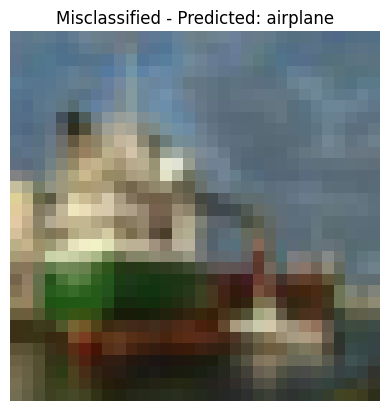

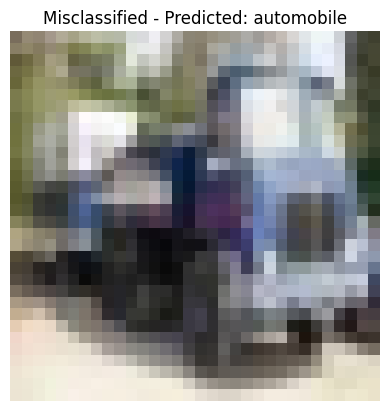

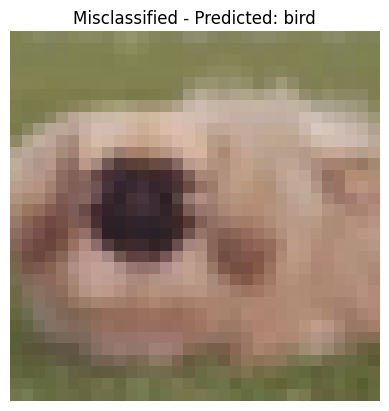

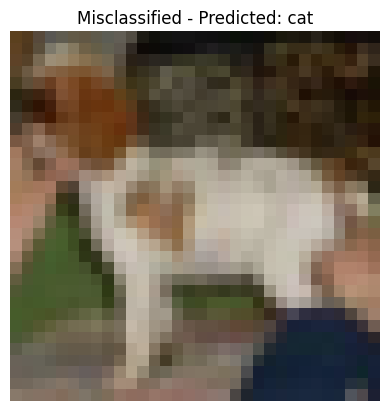

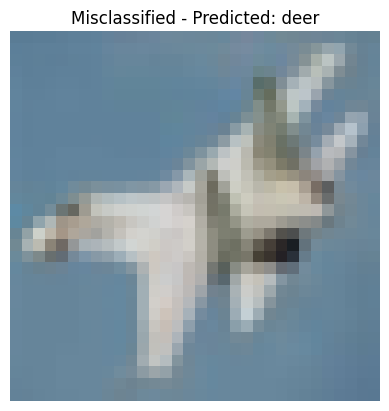

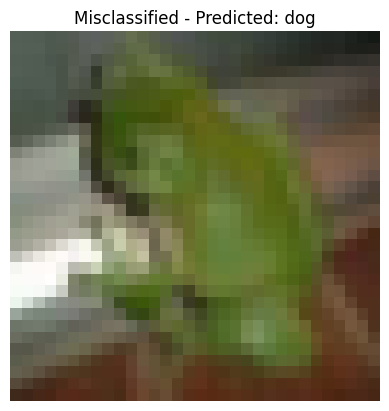

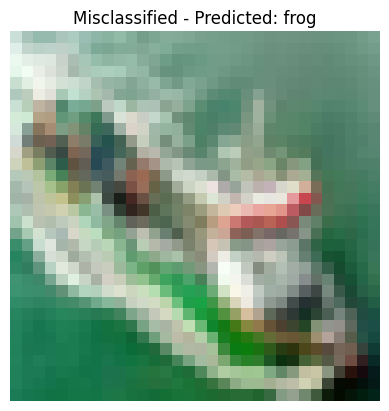

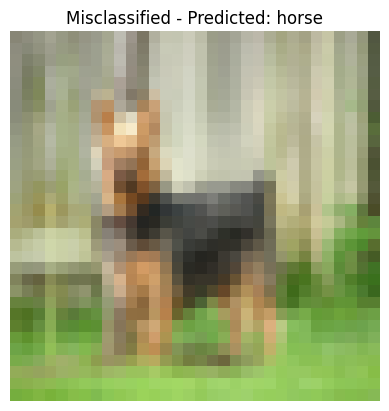

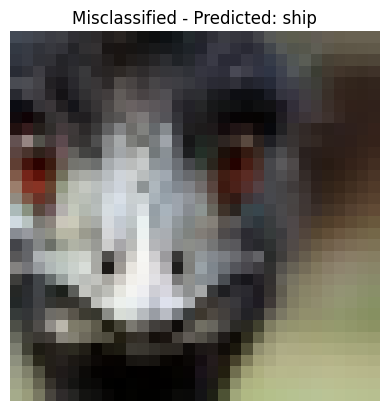

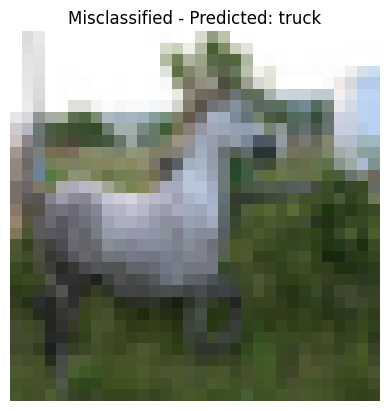

313/313 [==============================] - 1s 2ms/step
Correctly classified images for model with augmentation:


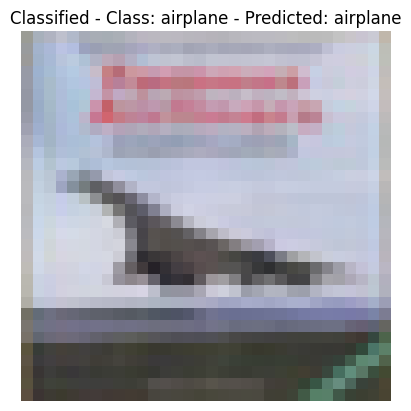

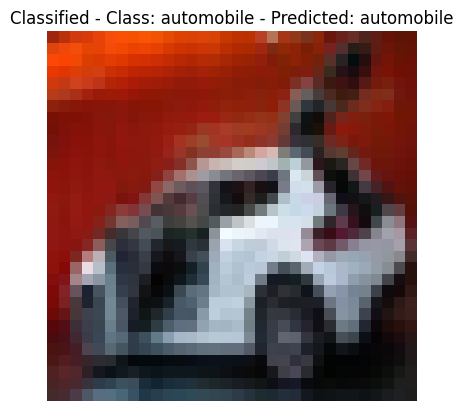

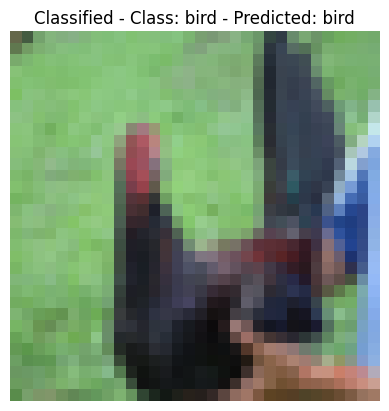

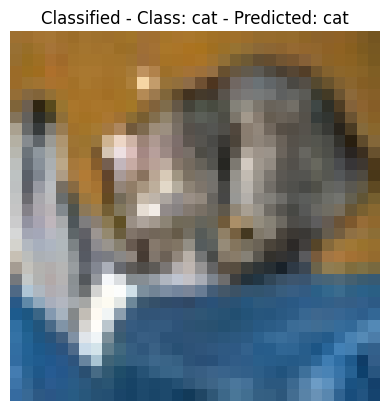

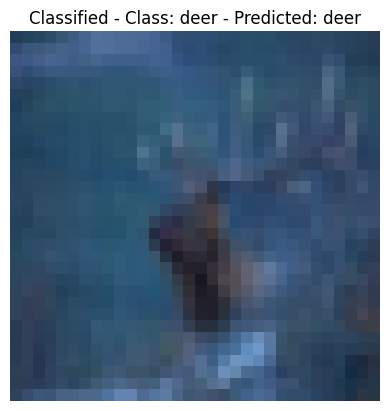

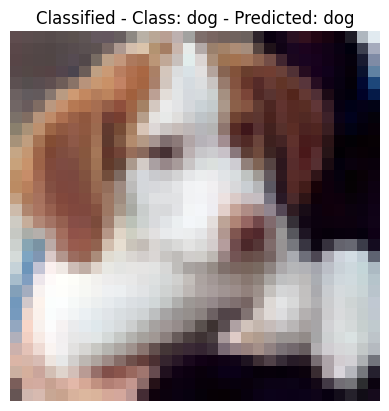

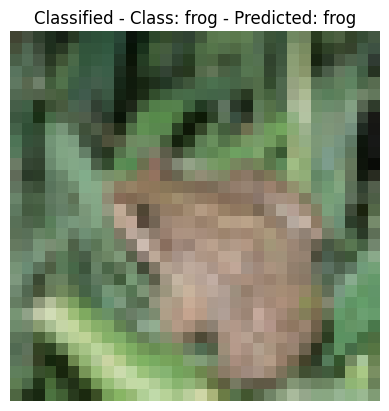

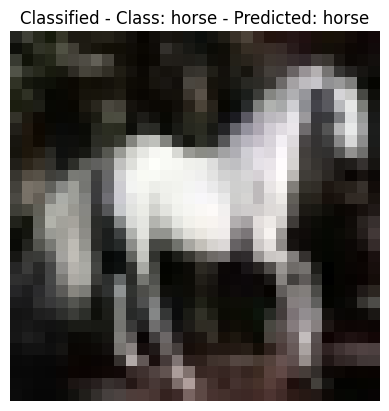

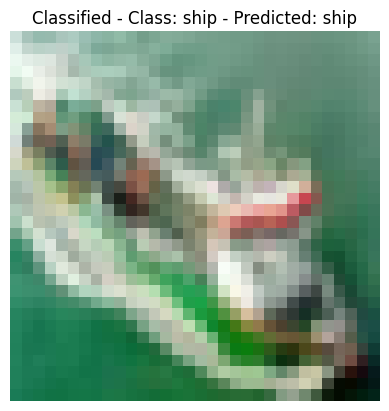

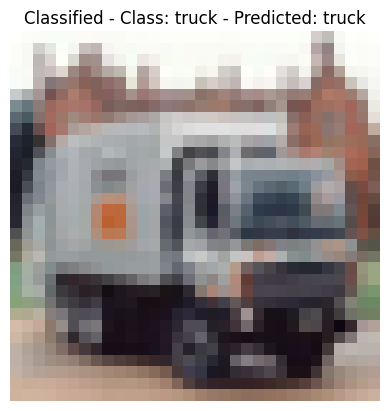

Incorrectly classified images for model with augmentation:


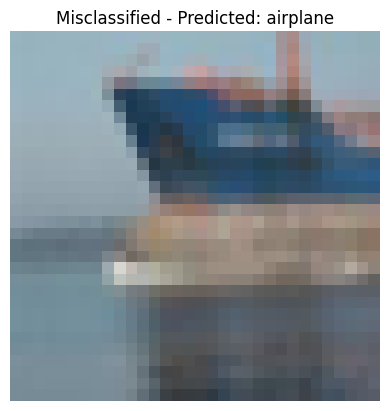

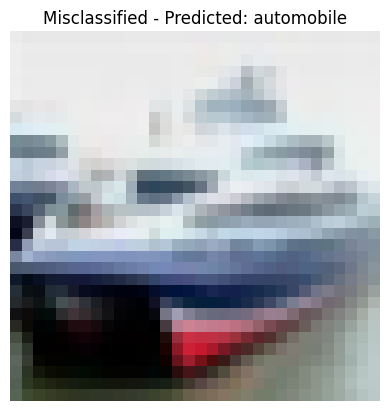

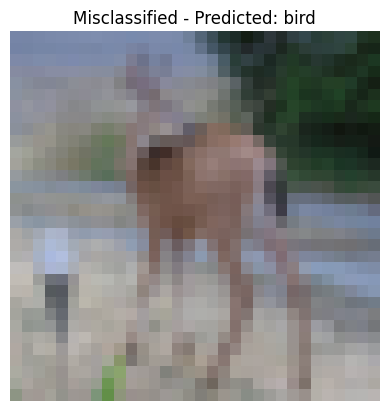

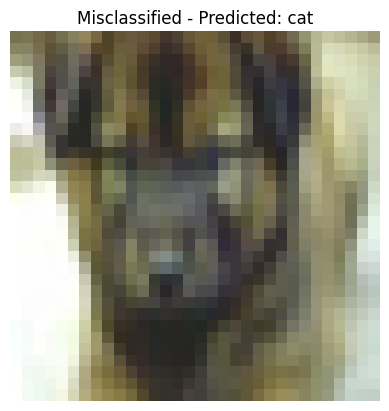

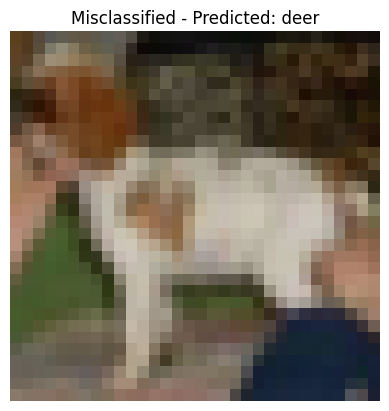

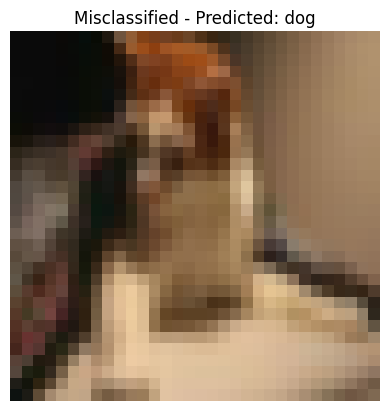

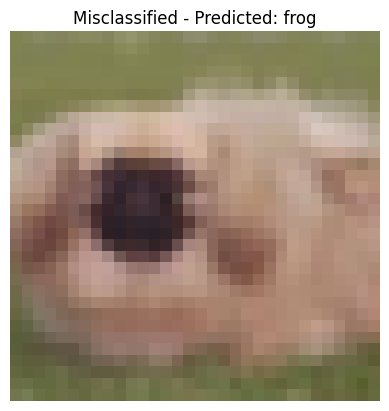

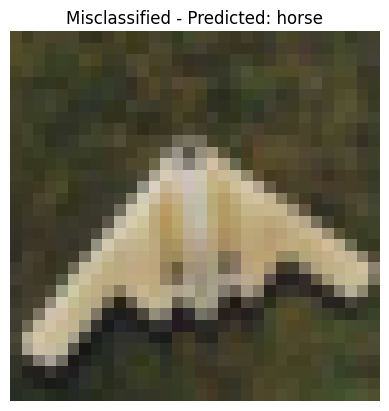

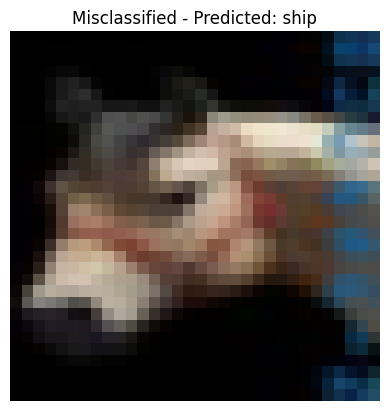

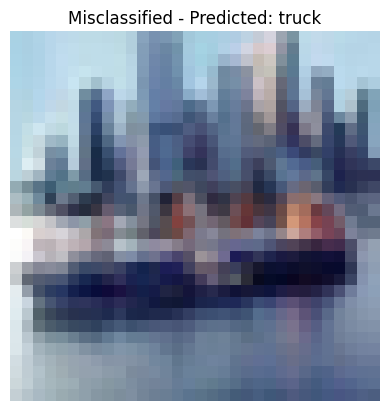

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

def plot_images(model, x_test, y_test, modelType, correct=True):
    y_pred = tf.argmax(model.predict(x_test), axis=-1)
    y_true = tf.argmax(y_test, axis=-1)

    corr_imgs = {new_list: [] for new_list in range(0, 10)}
    incorr_imgs = {new_list: [] for new_list in range(0, 10)}

    for i in range(len(x_test)):
        predVal_int = y_pred[i].numpy()
        trueVal_int = y_true[i].numpy()

        if predVal_int == trueVal_int:
            if len(corr_imgs[trueVal_int]) < 1:
                corr_imgs[trueVal_int].append((x_test[i], predVal_int))
        else:
            if len(incorr_imgs[predVal_int]) < 1:
                incorr_imgs[predVal_int].append((x_test[i], predVal_int))

    print(f"Correctly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(corr_imgs[i])):
            img, pred = corr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Classified - Class: {class_names[i]} - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

    print(f"Incorrectly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(incorr_imgs[i])):
            img, pred = incorr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Misclassified - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

plot_images(model, x_test, y_test, "model without augmentation", correct=True)
plot_images(modelAug, x_test, y_test, "model with augmentation", correct=True)


**Task 3:**
 Build a vision transformer from scratch and train this network to classify CIFAR-10 and CIFAR-100 images. Report your understanding of the several techniques involved. What performance do you get in comparison with the reported performances? Useful links: https://github.com/tensorflow/models/blob/master/official/vision/MODEL_GARDEN.md



In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [3]:
#CIFAR-10 dataset
(x_train10, y_train10), (x_test10, y_test10) = tf.keras.datasets.cifar10.load_data()

#CIFAR-100 dataset
(x_train100, y_train100), (x_test100, y_test100) = tf.keras.datasets.cifar100.load_data()

169001437/169001437 [==============================] - 2s 0us/step


In [13]:
X_train10 = tf.floor(tf.constant(x_train10, dtype = tf.float32)/255)
Y_train10 = tf.constant(y_train10, dtype = tf.int32)
X_test10 = tf.floor(tf.constant(x_test10, dtype = tf.float32)/255)
Y_test10 = tf.constant(y_test10, dtype = tf.int32)

X_train100 = tf.floor(tf.constant(x_train100, dtype = tf.float32)/255)
Y_train100 = tf.constant(y_train100, dtype = tf.int32)
X_test100 = tf.floor(tf.constant(x_test100, dtype = tf.float32)/255)
Y_test100 = tf.constant(y_test100, dtype = tf.int32)

In [14]:
Y_train10, Y_test10 = keras.utils.to_categorical(Y_train10), keras.utils.to_categorical(Y_test10)
Y_train100, Y_test100 = keras.utils.to_categorical(Y_train100), keras.utils.to_categorical(Y_test100)

In [8]:
def create_vit(num_classes, patch_size, num_layers, hidden_size, num_heads, mlp_size):
    inputs = keras.Input(shape=(32, 32, 3))
    
    patch_height = patch_size[0]
    patch_width = patch_size[1]
    num_channels = inputs.shape[-1]
    x = layers.Reshape((-1, patch_height * patch_width * num_channels))(inputs)
    x = layers.Dense(hidden_size)(x)
    
    num_patches = (inputs.shape[1] // patch_height) * (inputs.shape[2] // patch_width)
    pos_emb = layers.Embedding(input_dim=num_patches, output_dim=hidden_size)(tf.range(num_patches))
    x = pos_emb + x
    
    for _ in range(num_layers):
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size // num_heads)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + pos_emb)
        y = layers.Dense(mlp_size, activation="relu")(x)
        y = layers.Dense(hidden_size)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)
        
    x = layers.GlobalAveragePooling1D()(x)
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

vit_cifar10 = create_vit(num_classes=10, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)

vit_cifar100 = create_vit(num_classes=100, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)

In [15]:
vit_cifar10.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
vit_cifar10.fit(X_train10, Y_train10, epochs=3, validation_data=(X_test10, Y_test10), batch_size=64)

vit_cifar100.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
vit_cifar100.fit(X_train100, Y_train100, epochs=3, validation_data=(X_test100, Y_test100), batch_size=64)


Epoch 1/50


KeyboardInterrupt: ignored